## Data augmentation
me permite solucionar el problema de tener grandes cantidades de datos a partir de pocos datos, en este caso imágenes , esto debido a que los modelos lo requieren.
Hacer zoom, girando, invirtiendo, son algunas de las modificaciones que podemos realizar.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img ,img_to_array, load_img 
import matplotlib.pyplot as plt
import numpy as np
from skimage import io


In [2]:
datagen = ImageDataGenerator(rotation_range=40,
                  width_shift_range=0.2,
                  height_shift_range=0.3,
                  zoom_range=0.2,
                  horizontal_flip=True,
                  fill_mode="nearest",
                  brightness_range=[0.4,1.5])

In [3]:
img=load_img("../input/cnn-data-sources/Mara.jpeg")
x= img_to_array(img)
print(x.shape)
x=x.reshape((1,)+x.shape)
print(x.shape)

(800, 600, 3)
(1, 800, 600, 3)


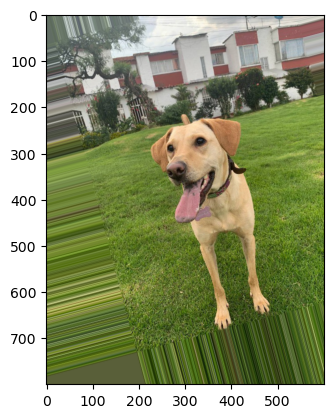

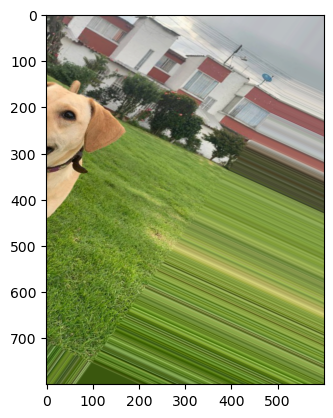

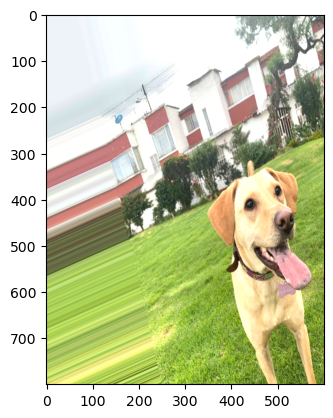

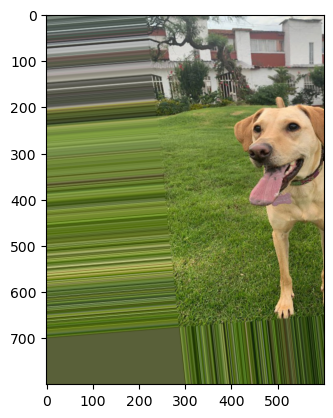

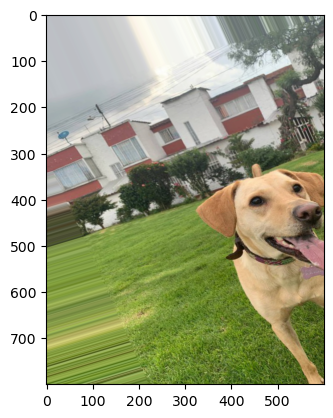

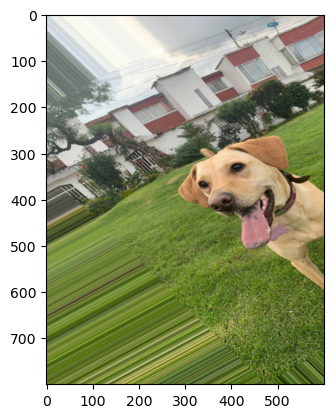

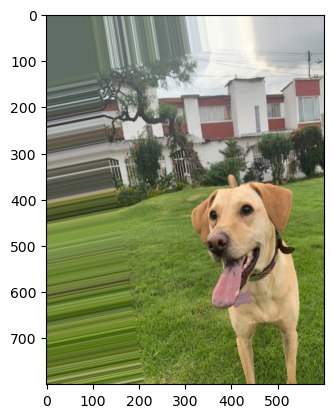

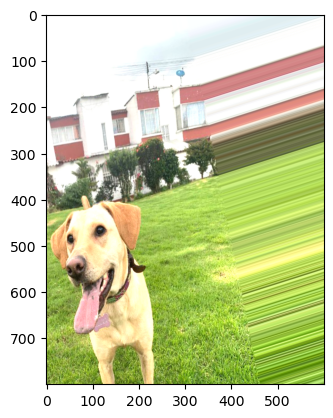

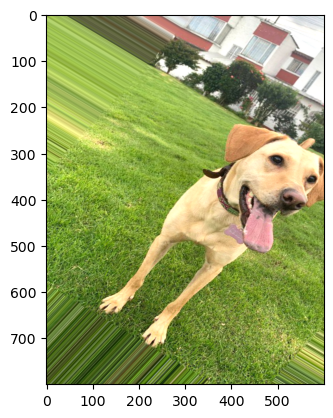

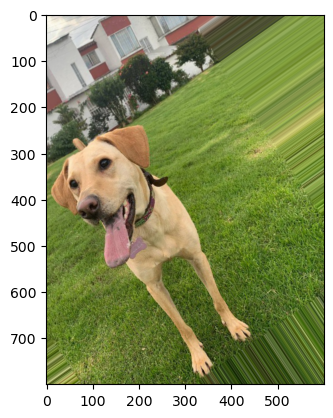

In [4]:
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i+= 1
    if i % 10 == 0:
        break
plt.show()

In [5]:
train_generator= datagen.flow_from_directory(
"/kaggle/input/cnn-data-sources/cats_and_dogs/train",
target_size=(150,150),
batch_size= 32,
class_mode="binary")

Found 2000 images belonging to 2 classes.


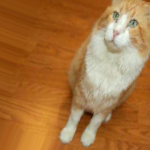

In [6]:
array_to_img(train_generator[0][0][3])